In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

from pickle import dump
from pickle import load

<h3 style="color: #FFC300">VI. Model Building</h3>
<p style="font-family: Comic Sans MS">Now I evaluate the effectiveness of machine learning algorithms in solving this binary classification problem using the selected features. The algorithms used include Decision Tree, Random Forest, Logistic Regression, K-Nearest Neighbors, Naive Bayes, Support Vector Machine, AdaBoost, and XGBoost. I use first the default parameters and then for fine-tunning the algorithms I create Grid Search for each algorithm to find the best hyperparameter values. Then I use the following metrics for evaluation: accuracy, precision, recall and F1-Score.</p>

In [5]:
# Load the data
df_final = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/Final Project/Code/DGA-Detection-final/data/processed/dga_features_final.csv')

key_features = ['long_consonant_str', 'unique_char_count', 'entropy', 'vowel_ratio',
                'unique_letter_count', 'd_length', 'consonant_ratio', 'unique_digit_count', 'ngrams']

X = df_final[key_features]
y = df_final['isDGA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Dimensions of the training and testing sets
print(f"The entire dataset has {df_final.shape[0]} rows and {df_final.shape[1]} columns.")
print(f"The training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"The testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"The target training set has {y_train.shape[0]} rows.")
print(f"The target testing set has {y_test.shape[0]} rows.")

The entire dataset has 159995 rows and 19 columns.
The training set has 127996 rows and 9 columns.
The testing set has 31999 rows and 9 columns.
The target training set has 127996 rows.
The target testing set has 31999 rows.


<h4 style="color: #FFC300">A. Test with Decision Tree Classifier</h4>

In [ ]:
%%time

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
%%time

hyperparams = {'criterion': ['gini', 'entropy'],
               'max_depth': [None, 5, 10, 15, 20],
               'min_samples_split': [2, 5, 10, 15, 20],
               'min_samples_leaf': [1, 2, 5, 10, 15]}

df_clf_gs = GridSearchCV(dt_clf, hyperparams, cv=5)
df_clf_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {df_clf_gs.best_params_}")
print(f"Best score: {df_clf_gs.best_score_}")

In [ ]:
%%time

dt_clf_opt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=15, random_state=42)
dt_clf_opt.fit(X_train, y_train)
y_pred_opt = dt_clf_opt.predict(X_test)

accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)

print(f"Accuracy: {accuracy_opt}")
print(f"Precision: {precision_opt}")
print(f"Recall: {recall_opt}")
print(f"F1 Score: {f1_opt}")

In [ ]:
dump(dt_clf_opt, open('../models/dt_clf_opt.pkl', 'wb'))

<h4 style="color: #FFC300">B. Test with Random Forest Classifier</h4>

In [ ]:
%%time

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

In [ ]:
%%time

hyperparams_rf = {'n_estimators': [50, 100, 150, 200],
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None, 5, 10, 15, 20],
                    'min_samples_split': [2, 5, 10, 15, 20],
                    'min_samples_leaf': [1, 2, 5, 10, 15]}

rf_gs = GridSearchCV(rf, hyperparams_rf, cv=5)
rf_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {rf_gs.best_params_}")
print(f"Best score: {rf_gs.best_score_}")

In [ ]:
%%time

rf_opt = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_opt.fit(X_train, y_train)
y_pred_rf_opt = rf_opt.predict(X_test)

accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
precision_rf_opt = precision_score(y_test, y_pred_rf_opt)
recall_rf_opt = recall_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt)

print(f"Accuracy: {accuracy_rf_opt}")
print(f"Precision: {precision_rf_opt}")
print(f"Recall: {recall_rf_opt}")
print(f"F1 Score: {f1_rf_opt}")

In [ ]:
dump(rf_opt, open('../models/rf_opt.pkl', 'wb'))

<h4 style="color: #FFC300">C. Test with Logistic Regression</h4>

In [ ]:
%%time

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

In [ ]:
%%time
hyperparams_lr = {'penalty': ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'solver': ['liblinear', 'saga', 'lbfgs']}

lr_gs = GridSearchCV(lr, hyperparams_lr, cv=5)
lr_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {lr_gs.best_params_}")
print(f"Best score: {lr_gs.best_score_}")

In [ ]:
%%time

lr_opt = LogisticRegression(penalty='l1', C=1, random_state=42, solver='liblinear') 
lr_opt.fit(X_train, y_train)
y_pred_lr_opt = lr_opt.predict(X_test)

accuracy_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
precision_lr_opt = precision_score(y_test, y_pred_lr_opt)
recall_lr_opt = recall_score(y_test, y_pred_lr_opt)
f1_lr_opt = f1_score(y_test, y_pred_lr_opt)

print(f"Accuracy: {accuracy_lr_opt}")
print(f"Precision: {precision_lr_opt}")
print(f"Recall: {recall_lr_opt}")
print(f"F1 Score: {f1_lr_opt}")

In [ ]:
dump(lr_opt, open('../models/lr_opt.pkl', 'wb'))

<h4 style="color: #FFC300">D. Test with K-Nearest Neighbor</h4>

In [ ]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

In [ ]:
hyperparams_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'p': [1, 2]}

knn_gs = GridSearchCV(knn_clf, hyperparams_knn, cv=5)
knn_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {knn_gs.best_params_}")
print(f"Best score: {knn_gs.best_score_}")

In [ ]:
%%time

knn_clf_opt = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='brute', p=1)
knn_clf_opt.fit(X_train, y_train)
y_pred_knn_opt = knn_clf_opt.predict(X_test)

accuracy_knn_opt = accuracy_score(y_test, y_pred_knn_opt)
precision_knn_opt = precision_score(y_test, y_pred_knn_opt)
recall_knn_opt = recall_score(y_test, y_pred_knn_opt)
f1_knn_opt = f1_score(y_test, y_pred_knn_opt)

print(f"Accuracy: {accuracy_knn_opt}")
print(f"Precision: {precision_knn_opt}")
print(f"Recall: {recall_knn_opt}")
print(f"F1 Score: {f1_knn_opt}")

In [ ]:
dump(knn_clf_opt, open('../models/knn_clf_opt.pkl', 'wb'))

<h4 style="color: #FFC300">E. Test with Naïve Bayes</h4>

In [ ]:
%%time

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

In [ ]:
%%time

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
nb_gs = GridSearchCV(nb_clf, param_grid, cv=5)
nb_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {nb_gs.best_params_}")
print(f"Best score: {nb_gs.best_score_}")

In [ ]:
%%time

nb_clf_opt = GaussianNB(var_smoothing=1e-9)
nb_clf_opt.fit(X_train, y_train)
y_pred_nb_opt = nb_clf_opt.predict(X_test)

accuracy_nb_opt = accuracy_score(y_test, y_pred_nb_opt)
precision_nb_opt = precision_score(y_test, y_pred_nb_opt)
recall_nb_opt = recall_score(y_test, y_pred_nb_opt)
f1_nb_opt = f1_score(y_test, y_pred_nb_opt)

print(f"Accuracy: {accuracy_nb_opt}")
print(f"Precision: {precision_nb_opt}")
print(f"Recall: {recall_nb_opt}")
print(f"F1 Score: {f1_nb_opt}")

In [ ]:
dump(nb_clf_opt, open('../models/nb_clf_opt.pkl', 'wb'))

<h4 style="color: #FFC300">F. Test with Support Vector Machine</h4>

In [ ]:
%%time

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")

In [ ]:
%%time

param_grid_svc = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'gamma': ['scale', 'auto', 0.1, 1]}

svc_gs = GridSearchCV(svc, param_grid_svc, cv=5)
svc_gs.fit(X_train_scaled, y_train)
print(f"Best hyperparameters: {svc_gs.best_params_}")
print(f"Best score: {svc_gs.best_score_}")

In [ ]:
%%time

svc_opt = SVC(C=100, kernel='linear', gamma='scale', random_state=42)
svc_opt.fit(X_train_scaled, y_train)
y_pred_svc_opt = svc_opt.predict(X_test_scaled)

accuracy_svc_opt = accuracy_score(y_test, y_pred_svc_opt)
precision_svc_opt = precision_score(y_test, y_pred_svc_opt)
recall_svc_opt = recall_score(y_test, y_pred_svc_opt)
f1_svc_opt = f1_score(y_test, y_pred_svc_opt)

print(f"Accuracy: {accuracy_svc_opt}")
print(f"Precision: {precision_svc_opt}")
print(f"Recall: {recall_svc_opt}")
print(f"F1 Score: {f1_svc_opt}")

In [ ]:
dump(svc_opt, open('../models/svc_opt.pkl', 'wb'))

<h4 style="color: #FFC300">G. Test with AdaBoost Classifier</h4>

In [ ]:
%%time

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=30,
                             learning_rate=0.5, random_state=42)

ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
y_pred_ada = ada_clf.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

In [ ]:
%%time

param_grid_ada = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.1, 0.5, 1.0, 1.5],
                  'algorithm': ['SAMME']}

ada_gs = GridSearchCV(ada_clf, param_grid_ada, cv=5)
ada_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {ada_gs.best_params_}")
print(f"Best score: {ada_gs.best_score_}")

In [ ]:
%%time

ada_clf_opt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=150,
                                    learning_rate=1.5, algorithm='SAMME', random_state=42)

ada_clf_opt.fit(X_train, y_train)
y_pred_ada_opt = ada_clf_opt.predict(X_test)

accuracy_ada_opt = accuracy_score(y_test, y_pred_ada_opt)
precision_ada_opt = precision_score(y_test, y_pred_ada_opt)
recall_ada_opt = recall_score(y_test, y_pred_ada_opt)
f1_ada_opt = f1_score(y_test, y_pred_ada_opt)

print(f"Accuracy: {accuracy_ada_opt}")
print(f"Precision: {precision_ada_opt}")
print(f"Recall: {recall_ada_opt}")
print(f"F1 Score: {f1_ada_opt}")

In [ ]:
dump(ada_clf_opt, open('../models/ada_clf_opt.pkl', 'wb'))

<h4 style="color: #FFC300">H. Test with XGBoost Classifier</h4>

In [ ]:
%%time

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

In [ ]:
%%time

param_grid_xgb = {'objective': ['binary:logistic', 'binary:logitraw', 'binary:hinge'],
                  'max_depth': [3, 5, 7, 9],
                  'learning_rate': [0.01, 0.1, 0.5, 1.0],
                  'subsample': [0.5, 0.75, 1.0],
                  'n_estimators': [50, 100, 150, 200]}  

xgb_gs = GridSearchCV(xgb_clf, param_grid_xgb, cv=5)
xgb_gs.fit(X_train, y_train)
print(f"Best hyperparameters: {xgb_gs.best_params_}")
print(f"Best score: {xgb_gs.best_score_}")

In [ ]:
%%time

xgb_clf_opt = XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.5, subsample=0.75, n_estimators=100, random_state=42)
xgb_clf_opt.fit(X_train, y_train)
y_pred_xgb_opt = xgb_clf_opt.predict(X_test)

accuracy_xgb_opt = accuracy_score(y_test, y_pred_xgb_opt)
precision_xgb_opt = precision_score(y_test, y_pred_xgb_opt)
recall_xgb_opt = recall_score(y_test, y_pred_xgb_opt)
f1_xgb_opt = f1_score(y_test, y_pred_xgb_opt)

print(f"Accuracy: {accuracy_xgb_opt}")
print(f"Precision: {precision_xgb_opt}")
print(f"Recall: {recall_xgb_opt}")
print(f"F1 Score: {f1_xgb_opt}")

In [ ]:
dump(xgb_clf_opt, open('../models/xgb_clf_opt.pkl', 'wb'))

In [ ]:
# Save the metric scores for each model in a dictionary
metric_scores = {'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'Support Vector Machine', 'AdaBoost', 'XGBoost'],
                 'Accuracy': [accuracy_opt, accuracy_rf_opt, accuracy_lr_opt, accuracy_knn_opt, accuracy_nb_opt, accuracy_svc_opt, accuracy_ada_opt, accuracy_xgb_opt],
                 'Precision': [precision_opt, precision_rf_opt, precision_lr_opt, precision_knn_opt, precision_nb_opt, precision_svc_opt, precision_ada_opt, precision_xgb_opt],
                 'Recall': [recall_opt, recall_rf_opt, recall_lr_opt, recall_knn_opt, recall_nb_opt, recall_svc_opt, recall_ada_opt, recall_xgb_opt],
                 'F1 Score': [f1_opt, f1_rf_opt, f1_lr_opt, f1_knn_opt, f1_nb_opt, f1_svc_opt, f1_ada_opt, f1_xgb_opt]}

df_metric_scores = pd.DataFrame(metric_scores)

In [ ]:
# Save the metric scores to a CSV file
df_metric_scores.to_csv('../data/processed/metric_scores.csv', index=False)

<h3 style="color: #FFC300">VII. Model Evaluation and Conclusions</h3>

In [2]:
model_results = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/Final Project/Code/DGA-Detection-final/data/processed/metric_scores.csv')

for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    model_results[col] = model_results[col].apply(lambda x: round(x, 3))

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.899,0.961,0.831,0.891
1,Random Forest,0.898,0.935,0.852,0.892
2,Logistic Regression,0.887,0.923,0.843,0.881
3,K-Nearest Neighbors,0.883,0.929,0.827,0.875
4,Naive Bayes,0.856,0.910,0.786,0.844
5,Support Vector Machine,0.889,0.937,0.832,0.881
6,AdaBoost,0.892,0.934,0.842,0.885
7,XGBoost,0.903,0.956,0.844,0.896


<img src="./img/results.png" width="1200" height="600" />

<p style="font-family: Comic Sans MS">Given the above results for the algorithms used, the XGBoost model is the best performing model with the highest accuracy, precision, recall, and F1 score. Finally, below I plot the ROC curve and AUC. The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1-specificity) for a binary classifier system as its discrimination threshold is varied. The area under the curve (AUC) is a measure of how well the model can distinguish between classes. An AUC of 1.0 would indicate a perfect model (which is not the case), while an AUC of 0.5 indicates a model that is no better than random guessing. In this case I get a value of 0.967, which is a very good value.</p>

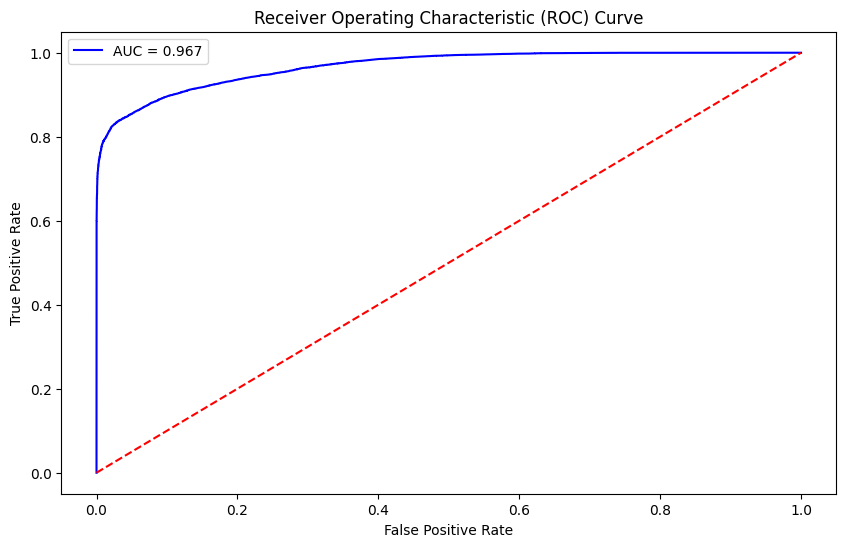

In [6]:
xgb_clf_opt = load(open('C:/Users/Jorge Payà/Desktop/4Geeks/Final Project/Code/DGA-Detection-final/models/xgb_clf_opt.pkl', 'rb'))

# Get the predicted probabilities
y_pred_proba = xgb_clf_opt.predict_proba(X_test)

# Compute the ROC curve and AUB: I get the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = np.trapz(tpr, fpr)
roc_auc

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()